## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [121]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [122]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [123]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [131]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for cols in columns:
    diabetes_data[cols].replace(to_replace=0, value=np.nan, inplace=True)

**<font color='teal'> Plot histograms of each column. </font>**

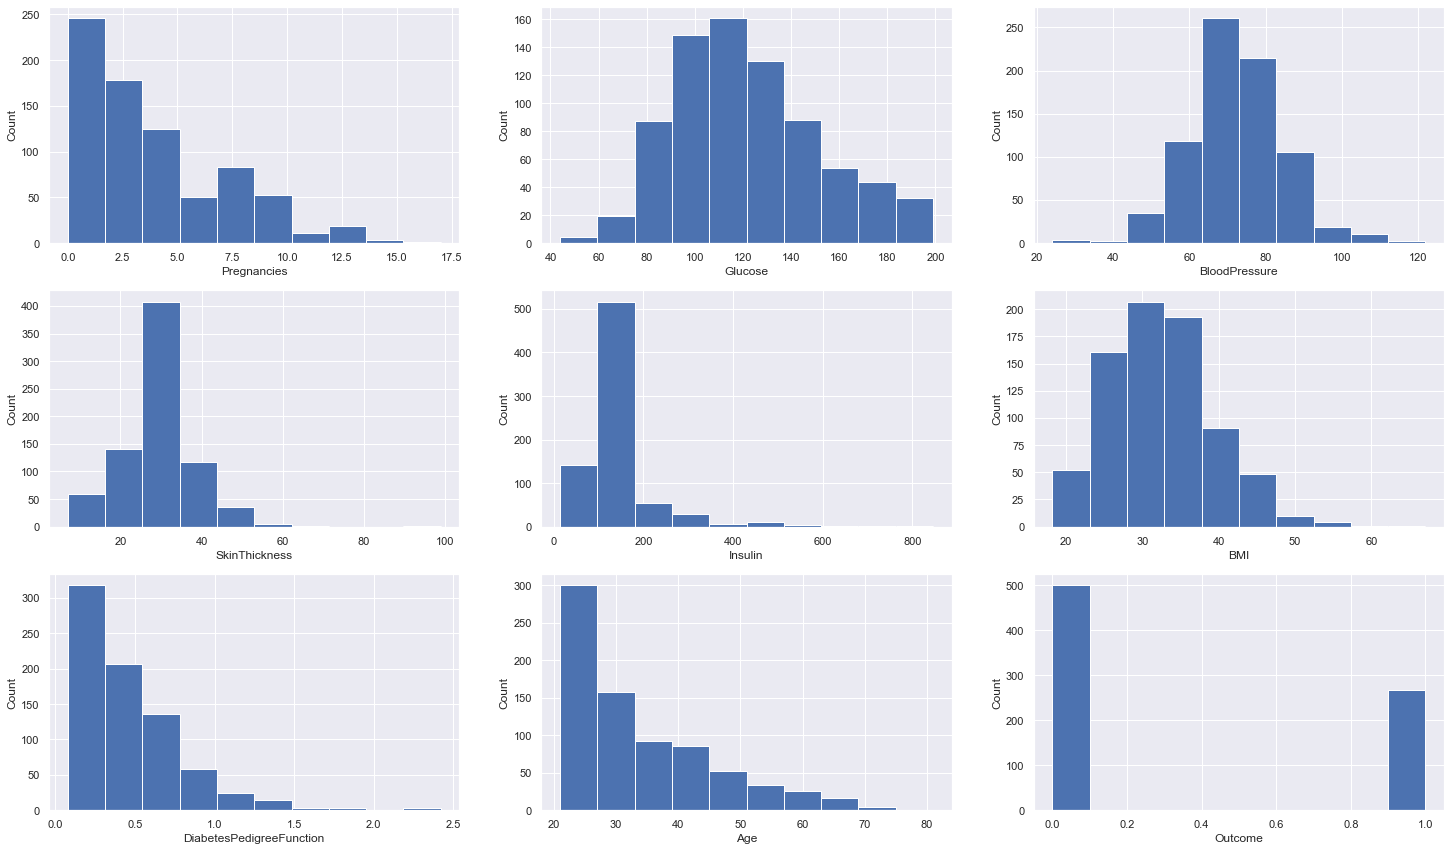

In [144]:
# Plot histogram of each columns using pyplot
plt.figure(figsize=(25,20))

p = 0
for feature in diabetes_data.columns:
    p+=1
    plt.subplot(4,3,p)
    plt.hist(diabetes_data[feature], bins=10)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.show()

#### Replace the zeros with mean and median values.

In [130]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

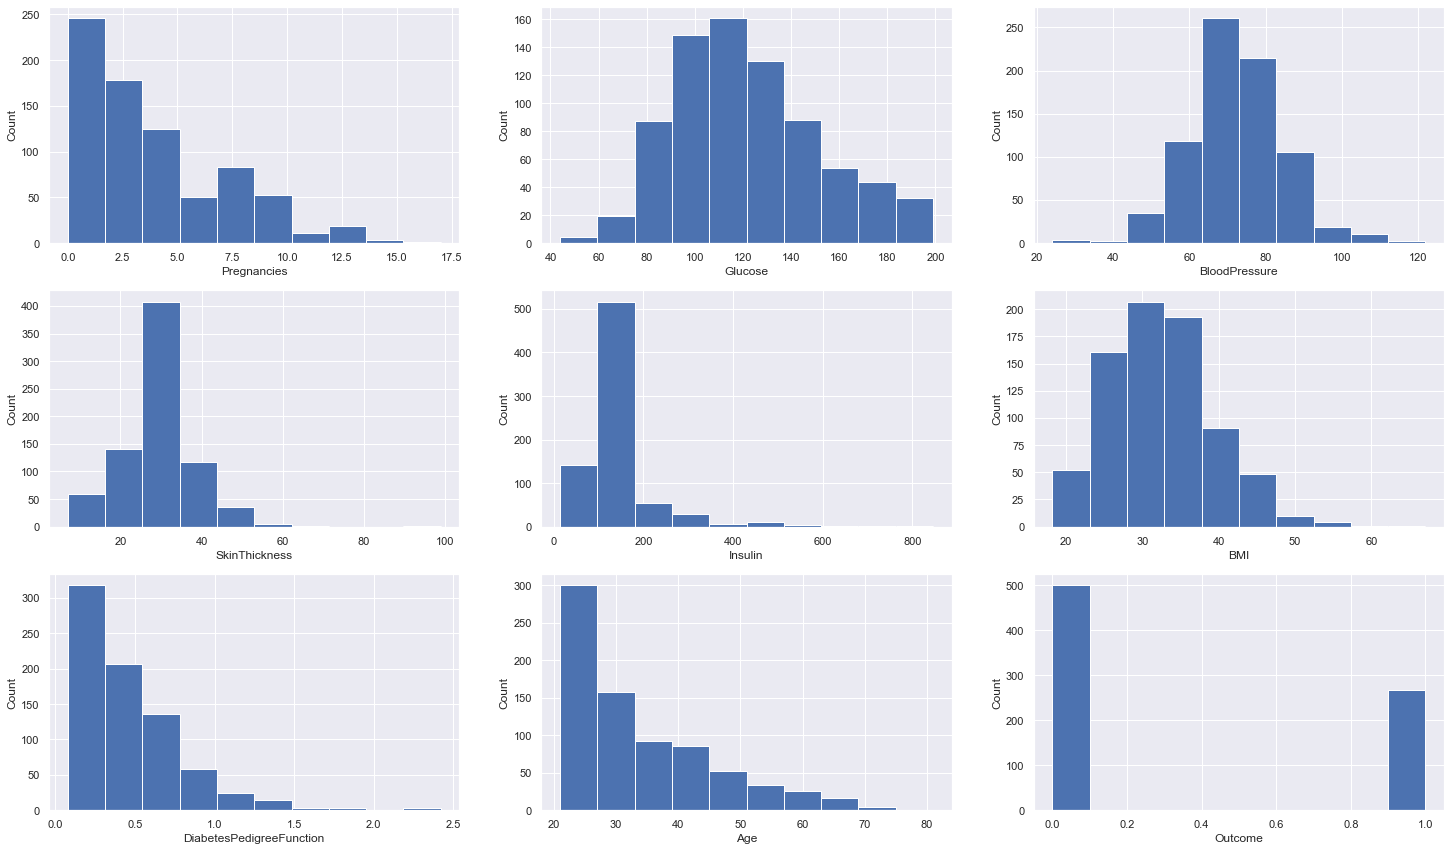

In [145]:
# Plot histogram of each columns after replacing the null values with the means of respective columns
plt.figure(figsize=(25,20))

p = 0
for feature in diabetes_data.columns:
    p+=1
    plt.subplot(4,3,p)
    plt.hist(diabetes_data[feature], bins=10)
    plt.xlabel(feature)
    plt.ylabel('Count')
#plt.title('Histogram of each column of Pima Indian dataset')
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


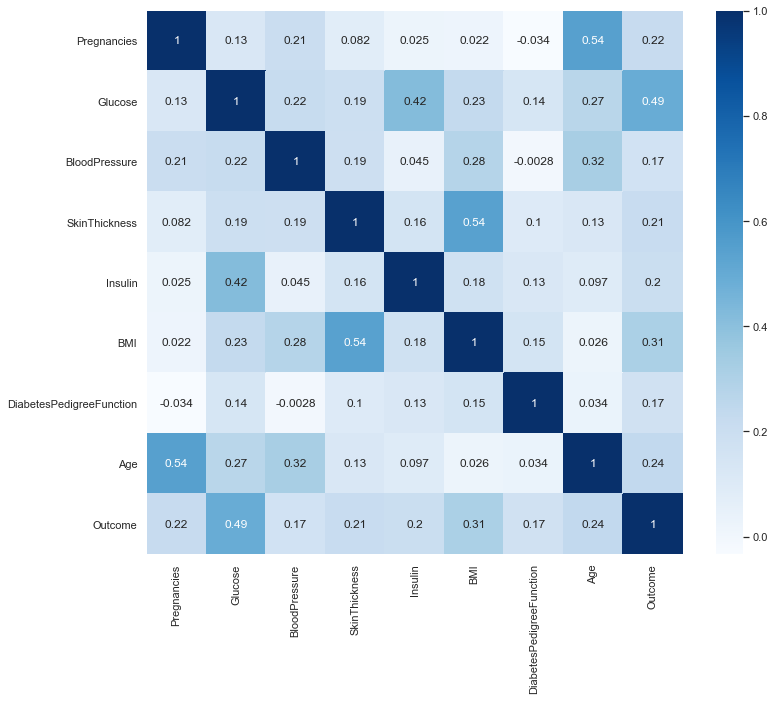

In [56]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

#### Observation:
The outcome has strongest corelation with Glucose as compared to the other features followed by BMI. There seems to be strong corelation beween Age and Glucose, BMI and SkinThickness, Insulin and Glucose.

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [62]:
y = diabetes_data['Outcome']
X = diabetes_data.drop(labels='Outcome', axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [65]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.30, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [143]:
k=1
print('Train scores are:')
for i,j in zip(train_scores,test_scores):
    print('Neighbors:', k, 'train_score:',np.round(i,3), 'test_score:',np.round(j,3))
    k = k + 1
    
#print('Test scores are', test_scores)

Train scores are:
Neighbors: 1 train_score: 1.0 test_score: 0.667
Neighbors: 2 train_score: 0.851 test_score: 0.671
Neighbors: 3 train_score: 0.855 test_score: 0.671
Neighbors: 4 train_score: 0.842 test_score: 0.693
Neighbors: 5 train_score: 0.84 test_score: 0.701
Neighbors: 6 train_score: 0.823 test_score: 0.684
Neighbors: 7 train_score: 0.834 test_score: 0.732
Neighbors: 8 train_score: 0.821 test_score: 0.736
Neighbors: 9 train_score: 0.827 test_score: 0.732


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

The number of neighbors that resulted in the max score in the training dataset is 1.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

The number of neighbors that resulted in the max score in the testing dataset are 8

Plot the train and test model performance by number of neighbors.

/Users/pranoti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pranoti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


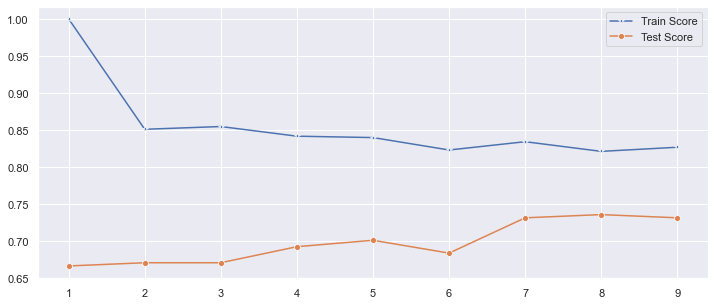

In [71]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

Based on the plot, the best number of neighbors for the training data set is 3 and the best number of neighbors for the test data set are 8.

In [72]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [74]:
#Printing confusion matix for the predictions
print("Confusion Matrix")
print(pl)

Confusion Matrix
[[121  30]
 [ 32  48]]


Observation:
The model has 121 True Negatives(correct prediction for outcome of 0 out of total 153) and 48 True Positives (correct prediction for outcome of 1 out of total 78)
The model has 32 False negative and 30 False positive predictions from the total of 231 predicted values.

**<font color='teal'> Print the classification report </font>**

In [75]:
#Printing classification report for the predictions
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



Observation:
The model have a precsion rate of 62%, recall rate of 60% and f1-score of 0.61 for predicting outcome of 1 while,
the model have a precision rate of 79%, recall rate of 80% and f1-score of 0.80 for predicting outcome of 0.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [77]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [93]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

#Number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
#Number of features to consider in every split
max_features = ['auto', 'sqrt']
#Max number of levels
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=11)]
max_depth.append(None)
#Max number of samples needed to split at a node
min_samples_split = [2,5,10]
#Min number of samples needed ato split at a node
min_samples_leaf = [1,2,4]
#Method of selecting sample to train each tree
bootstrap = [True, False]


#Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               }

#Random Search using 3 fold cross validation and random grid
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#Fit the model
rf_random.fit(X,y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [94]:
print(rf_random.best_score_)
print(rf_random.best_estimator_)

0.7734375
RandomForestClassifier(max_depth=73, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5)


Observation:
The score has improve from 0.752 using GridSearchCV to 0.773 using RandomizedSearchCV. The best estimators found are max_depth of 73, minimum sample split of 5 and minimum sample leaf to be 4.